<a href="https://colab.research.google.com/github/nurayaaltug/MultilayerPerceptron/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  
        return x
input_size = 13
hidden_size1 = 100
hidden_size2 = 50
output_size = 2
learning_rate = 0.01
num_epochs = 50
batch_size = 16

model = MLP(input_size, hidden_size1, hidden_size2, output_size)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)  




Epoch: 1, Validation Accuracy: 51.59%
Epoch: 1, Batch: 79, training Loss: 0.6921
Epoch: 1, Batch: 79, val loss: 0.6920
Epoch: 2, Validation Accuracy: 53.18%
Epoch: 2, Batch: 79, training Loss: 0.6914
Epoch: 2, Batch: 79, val loss: 0.6887
Epoch: 3, Validation Accuracy: 55.41%
Epoch: 3, Batch: 79, training Loss: 0.6835
Epoch: 3, Batch: 79, val loss: 0.6884
Epoch: 4, Validation Accuracy: 57.01%
Epoch: 4, Batch: 79, training Loss: 0.6760
Epoch: 4, Batch: 79, val loss: 0.6878
Epoch: 5, Validation Accuracy: 59.55%
Epoch: 5, Batch: 79, training Loss: 0.6826
Epoch: 5, Batch: 79, val loss: 0.6919
Epoch: 6, Validation Accuracy: 61.15%
Epoch: 6, Batch: 79, training Loss: 0.6746
Epoch: 6, Batch: 79, val loss: 0.6815
Epoch: 7, Validation Accuracy: 63.38%
Epoch: 7, Batch: 79, training Loss: 0.6813
Epoch: 7, Batch: 79, val loss: 0.6897
Epoch: 8, Validation Accuracy: 66.24%
Epoch: 8, Batch: 79, training Loss: 0.6861
Epoch: 8, Batch: 79, val loss: 0.6895
Epoch: 9, Validation Accuracy: 70.06%
Epoch: 9, 

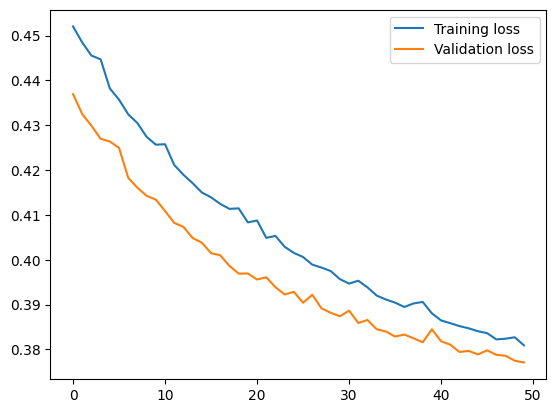

In [2]:
class PrincessDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values

        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.FloatTensor(self.X[idx])
        y = torch.LongTensor([self.y[idx]])
        return X, y


train_data = pd.read_csv('sample_data/cure_the_princess_train.csv')
valid_data = pd.read_csv('sample_data/cure_the_princess_validation.csv')
test_data = pd.read_csv('sample_data/cure_the_princess_test.csv')


train_dataset = PrincessDataset(train_data)
valid_dataset = PrincessDataset(valid_data)
test_dataset = PrincessDataset(test_data)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

torch.manual_seed(190401056)
best_accuracy = 0
best_epoch = 0
patience = 5
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.squeeze())
        loss.backward()
        optimizer.step()


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            val_loss = criterion(output, target.squeeze())
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target.squeeze()).sum().item()
    
    accuracy = 100 * correct / total
    print('Epoch: {}, Validation Accuracy: {:.2f}%'.format(epoch+1, accuracy))
    print('Epoch: {}, Batch: {}, training Loss: {:.4f}'.format(epoch+1, batch_idx+1, loss.item()))
    print('Epoch: {}, Batch: {}, val loss: {:.4f}'.format(epoch+1, batch_idx+1, val_loss.item()))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch
        torch.save(model.state_dict(), 'best_model.pt')
  
    elif epoch - best_epoch > patience:
        print(f'Early stopping: validation accuracy has not improved for {patience} epochs.')
        break
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss/len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target.squeeze())
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target.squeeze()).sum().item()
        val_losses.append(val_loss/len(valid_loader))   

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

Epoch: 1, Validation Accuracy: 95.22%
Epoch: 2, Validation Accuracy: 95.22%
Epoch: 3, Validation Accuracy: 95.22%
Epoch: 4, Validation Accuracy: 95.22%
Epoch: 5, Validation Accuracy: 95.22%
Epoch: 6, Validation Accuracy: 95.22%
Epoch: 7, Validation Accuracy: 95.22%
Early stopping: validation accuracy has not improved for 5 epochs.


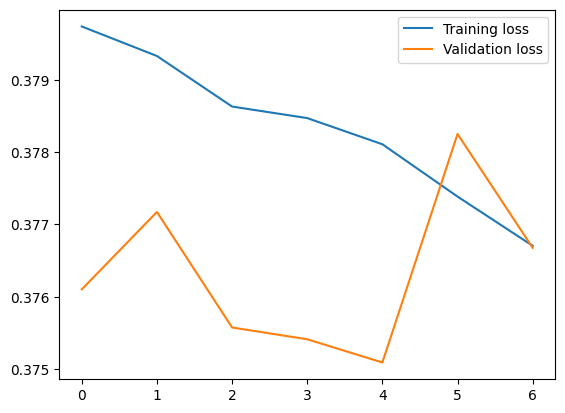

In [3]:
train_losses = []
val_losses = []
torch.manual_seed(190401056)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss/len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            loss = criterion(output, target.squeeze())
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target.squeeze()).sum().item()
        val_losses.append(val_loss/len(valid_loader))
    
    accuracy = 100 * correct / total
    print('Epoch: {}, Validation Accuracy: {:.2f}%'.format(epoch+1, accuracy))
 
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch
        torch.save(model.state_dict(), 'best_model.pt')
 
    elif epoch - best_epoch > patience:
        print(f'Early stopping: validation accuracy has not improved for {patience} epochs.')
        break

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [4]:

best_model = MLP(input_size, hidden_size1, hidden_size2, output_size)

best_model.load_state_dict(torch.load("best_model.pt"))

best_model.eval()

MLP(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
  (activation): ReLU()
)

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

best_model.eval()

test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
X_test, y_test = next(iter(test_loader))

with torch.no_grad():
    output = best_model(X_test)
    _, predicted = torch.max(output.data, 1)

accuracy = accuracy_score(y_test.squeeze().numpy(), predicted.numpy()) * 100
report = classification_report(y_test.squeeze().numpy(), predicted.numpy(), target_names=["Not Saved", "Saved"])

print(f"Accuracy: {accuracy:.2f}%")
print(f"Classification Report:\n{report}")

Accuracy: 93.91%
Classification Report:
              precision    recall  f1-score   support

   Not Saved       0.93      0.95      0.94       384
       Saved       0.95      0.93      0.94       388

    accuracy                           0.94       772
   macro avg       0.94      0.94      0.94       772
weighted avg       0.94      0.94      0.94       772

